<a href="https://colab.research.google.com/github/DaramG-star/TIL/blob/master/backtracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 백트래킹

백트래킹 (Backtracking) 기법은 해를 찾는 도중에 막히면 (즉, 해가 아니면) 되돌아가서 다시 해를 찾아가는 기법이다.

백트래킹 기법은 최적화(optimization)문제와 결정 (decision)문제를 해결할 수 있다.

결정 문제 : 문제의 조건을 만족하는 해가 존재하는지 여부를 'yes' 또는 'no'가 답하는 문제

- 미로찾기

- n-Queen 문제

- Map coloring

- 부분집합의 합(Subset Sum)문제 등

백트래킹과 깊이우선탐색과의 차이

어떤 노드에서 출발하는 경로가 해결책으로 이어질 것 같지 않으면 더 이상 그 경로를 따라가지 않음으로써 시도의 횟수를 줄임 (Prunning 가지치기)

깊이 우선 탐색이 모든 경로를 추적하는데 비해 백트래킹은 불필요한 경로를 조기에 차단

깊이우선탐색을 가하기에는 경우의 수가 너무 많음. 즉 N! 가지의 경우의 수를 가진 문제에 대해 깊이우선탐색을 가하면 당연히 처리 불가능한 문제

백트래킹 알고리즘을 적용하면 일반적으로 경우의 수가 줄어들지만 이 역시 최악의 경우에는 여전히 지수함수 시간(Exponential Time)을 요하므로 처리 불가능

**모든 후보를 검사?**

NO!

**백트래킹 기법**

어떤 노드의 유망성을 점검한 후에 유망(promising)하지 않다고 결정되면 그 노드의 부모로 되돌아가(backtracking) 다음 자식 노드로 감

어떤 노드를 방문하였을 때, 그 노드를 포함한 경로가 해답이 될 수 없으면 그 노드를 유망하지 않다고 하며, 반대로 해답의 가능성이 있으면 유망하다고 한다.

가지치기 (pruning) : 유망하지 않은 노드가 포함되는 경로는 더 이상 고려하지 않는다.

백트래킹을 이용한 알고리즘은 다음과 같은 절차로 진행된다.

1. 상태 공간 트리의 깊이 우선 검색을 실시한다.

2. 각 노드가 유망한지를 점검한다.

3. 만일 그 노드가 유망하지 않으면, 그 노드의 부모 노드로 돌아가서 검색을 계속한다.



## 부분집합

어떤 집합의 공집합과 자기자신을 포함한 모든 부분집합을 powerset이라고 하며 구하고자 하는 어떤 집합의 원소 개수가 n일 경우 부분집합의 개수는 2^n 개 이다.

백트래킹 기법으로 powerset 을 만들어보자

앞에서 설명한 일반적인 백트래킹 접근 방법을 이용한다.

n개의 원소가 들어있는 집합의 2^n 개의 부분집합을 만들 때는, true 또는 false 값을 가지는 항목들로 구성된 n개의 배열을 만드는 방법을 이용

여기서 배열의 i 번째 항목은 i 번째의 원소가 부분집합의 값인지 아닌지를 나타내는 값이다.

In [ ]:
# 각 원소가 부분집합에 포함되었는지를 loop 이용하여 확인하고 부분집합을 생성하는 방법

bit = [0, 0, 0, 0]
for i in range(2):
    bit[0] = i
    for j in range(2):
        bit[1] = j
        for k in range(2):
            bit[2] = k
            for l in range(2):
                bit[3] = l

                print(bit)

[0, 0, 0, 0]
[0, 0, 0, 1]
[0, 0, 1, 0]
[0, 0, 1, 1]
[0, 1, 0, 0]
[0, 1, 0, 1]
[0, 1, 1, 0]
[0, 1, 1, 1]
[1, 0, 0, 0]
[1, 0, 0, 1]
[1, 0, 1, 0]
[1, 0, 1, 1]
[1, 1, 0, 0]
[1, 1, 0, 1]
[1, 1, 1, 0]
[1, 1, 1, 1]


In [ ]:
# powerset을 구하는 백트래킹 알고리즘

def process_solution(a, k):
    subset = [i for i in range(1, k+1) if a[i]]  # 부분집합을 구성
    print(subset)  # 부분집합 출력

def construct_candidates(a, k, input, c):
    c[0] = True   # 현재 원소를 포함하는 경우
    c[1] = False  # 현재 원소를 포함하지 않는 경우
    return 2  # 두 가지 선택 가능 (True / False)

def backtrack(a, k, input):
    global MAXCANDIDATES
    c = [0] * MAXCANDIDATES

    if k == input:  # 모든 원소를 선택했을 때
        process_solution(a, k)  # 현재 부분집합 출력
    else:
        k += 1  # 다음 원소 처리
        ncandidates = construct_candidates(a, k, input, c)  # 선택지 생성
        for i in range(ncandidates):
            a[k] = c[i]  # 선택한 값 저장
            backtrack(a, k, input)  # 다음 단계 진행

MAXCANDIDATES = 2
NMAX = 4
a = [0] * NMAX  # 부분집합을 저장할 배열

backtrack(a, 0, 3)  # 부분집합 생성 시작 (3개의 원소)

[1, 2, 3]
[1, 2]
[1, 3]
[1]
[2, 3]
[2]
[3]
[]


In [ ]:
#부분집합을 포함시켰는지 여부를 확인

def f(i, k):
    if i == k:      # 모든 원소에 대해 결정하면
        ss = 0      # 부분집합 원소의 합
        for j in range(k):
            if bit[j]:     # A[i]가 포함된 경우
                print(A[j], end = ' ')
                ss += A[j]
        print(ss)
    else:
        for j in range(1, -1, -1):
            bit[i] = j
            f(i+1, k)
        # bit[i] = 1
        # f(i+1, k)
        # bit[i] = 0
        # f(i+1, k)

N = 3

A = [1, 2, 3]

bit = [0] * N     # bit[i]는 A[i]가 부분집합에 포함되는지 표시

f(0, N)

1 2 3 6
1 2 3
1 3 4
1 1
2 3 5
2 2
3 3
0


In [ ]:
def f(i, k, t): # k 개의 원소를 가진 배열A, 부분집합의 합이 t인 경우
    if i == k:      # 모든 원소에 대해 결정하면
        ss = 0      # 부분집합 원소의 합
        for j in range(k):
            if bit[j]:     # A[i]가 포함된 경우
                ss += A[j]  # 부분집합 원소의 합
                #print(A[j], end = ' ') 부분집합 출력
        if ss == t:
            for j in range(k):
                if bit[j]:  # A[i]가 포함된 경우
                    ss += A[j]
                    print(A[j], end = ' ')
            print()     # 부분집합 출력
    else:
        for j in range(1, -1, -1):
            bit[i] = j
            f(i+1, k, t)
        # bit[i] = 1
        # f(i+1, k)
        # bit[i] = 0
        # f(i+1, k)

N = 10

A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

bit = [0] * N     # bit[i]는 A[i]가 부분집합에 포함되는지 표시

f(0, N, 10)

1 2 3 4 
1 2 7 
1 3 6 
1 4 5 
1 9 
2 3 5 
2 8 
3 7 
4 6 
10 


## 재귀함수

In [ ]:
def f(i, k, s, t): # k 개의 원소를 가진 배열A, 부분집합의 합이 t인 경우
    global cnt
    cnt += 1
    if s == t:      # 목표치에 도달하면
        for j in range(k):
            if bit[j]:  # A[i]가 포함된 경우
                s += A[j]
                print(A[j], end=' ')
        print()

    elif i == k: # 모든 원소를 고려했으나 s!=t
        return
    elif s > t: # 고려한 원소의 합이 t보다 큰 경우
        return
    else:
        # for j in range(1, -1, -1):
        #     bit[i] = j
        #     f(i+1, k, t)
        bit[i] = 1
        f(i+1, k, s+A[i], t)
        bit[i] = 0
        f(i+1, k, s, t)

N = 10

A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

bit = [0] * N     # bit[i]는 A[i]가 부분집합에 포함되는지 표시

cnt = 0
f(0, N, 0, 10)  #처음, 끝, 합의 초깃값, 문자의 갯수

print('cnt : ', cnt)    # 전부 확인하는 경우의 수

1 2 3 4 
1 2 7 
1 3 6 
1 4 5 
1 9 
2 3 5 
2 8 
3 7 
4 6 
10 
cnt :  349


## 순열

In [ ]:
# 동일한 숫자가 포함되지 않앗을 때, 각 자리 수 별로 loop를 이용하여 구현할 수 있다.
for i1 in range(1, 4):
    for i2 in range(1, 4):
        if i2 != i1:
            for i3 in range(1, 4):
                if i3 != i1 and i3 != i2:
                    print(i1, i2, i3)

1 2 3
1 3 2
2 1 3
2 3 1
3 1 2
3 2 1


In [ ]:
# 백트래킹을 이용하여 순열 구하기

def backtrack(a, k, input):
    global MAXCANDIDATES
    c = [0] * MAXCANDIDATES

    if k == input:
        for i in range(1, k+1):
            print(a[i], end = ' ')
        print()
    else:
        k += 1
        ncandidates = construct_candidates(a, k, input, c)
        for i in range(ncandidates):
            a[k] = c[i]
            backtrack(a, k, input)

def construct_candidates(a, k, input, c):
    in_perm = [False] * NMAX

    for i in range(1, k):
        in_perm[a[i]] = True

    ncandidates = 0
    for i in range(1, input+1):
        if in_perm[i] == False:
            c[ncandidates] = i
            ncandidates += 1
    return ncandidates

In [ ]:
#순열

def f(i, k):
    if i == k:
        print(*P)
    else:
        for j in range(i, k):    # P[i] 자리에 바꿀 원소
            P[i], P[j] = P[j], P[i]  # P[i] <-> P[j]
            f(i+1, k)   # 순열 자리 결정
            P[i], P[j] = P[j], P[i] # 교환전으로 복구 원상복구

N = 3
P = [1, 2, 3]
f(0, N)

In [ ]:
def f(i, k, s):     # s는 i-1까지 탐색한 합
    global min_v
    global cnt
    cnt += 2
    if i == k:  # 모든 원소를 고려했니?
        # print(*P)
        if min_v > s:   # 비교하는 순서, 대입하는 순서 맞춰주면 좋음!
            min_v = s
    elif s >= min_v:    # 모든 원소를 고려하지 않았으면 리턴하렴
        return
    else:
        for j in range(i, k):    # P[i] 자리에 바꿀 원소
            P[i], P[j] = P[j], P[i]  # P[i] <-> P[j]
            f(i+1, k, s+arr[i][P[i]])   # 순열 자리 결정
            P[i], P[j] = P[j], P[i] # 교환전으로 복구 원상복구

N = int(input())
arr = [list(map(int, input().split())) for _ in range(N)]
P = [i for i in range(N)]
min_v = 100 # 나와있는 모든 수를 더해도 100이 넘지 않음
cnt = 0
f(0, N, 0)
print(min_v, cnt)

## 부분집합의 합

10개의 정수를 입력 받아 부분집합의 합이 0이 되는 것이 존재하는지를 계산하는 함수를 작성해보자.

부분집합의 합이 0인 것이 존재하면 1을 출력하고 그렇지 않으면 0을 출력한다. (단 공집합은 제외)

In [ ]:
def f(n,k,cursum):
    global ans
    if n == k:
        #공집합은 제외
        if sum(bit) == 0: #공집합인 경우
            return
        if cursum == 0:
            ans = 1
            return
    else:
        bit[k] = 1
        f(n, k+1, cursum + arr[k])#이전의 합에 새로 생긴 원소 더해서 보내기
        bit[k] = 0
        f(n, k+1, cursum)#이전의 합 전달하기

T =int(input())
for tc in range(1, T+1):
    N = int(input())
    arr = list(map(int, input().split()))
    bit = [0] * N
    ans = 0
    f(N,0,0)

    print(f'#{tc} {ans}')

## 배열 최소 합

NxN 배열에 숫자가 들어있다. 한 줄에서 하나씩 N개의 숫자를 골라 합이 최소가 되도록 하려고 한다. 단, 세로로 같은 줄에서 두 개 이상의 숫자를 고를 수 없다.

조건에 맞게 숫자를 골랐을 때의 최소 합을 출력하는 프로그램을 만드시오.


예를 들어 다음과 같이 배열이 주어진다.


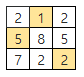


이경우 1, 5, 2를 고르면 합이 8로 최소가 된다.



[입력]


첫 줄에 테스트 케이스 개수 T가 주어진다.  1≤T≤50


다음 줄부터 테스트 케이스의 첫 줄에 숫자 N이 주어지고, 이후 N개씩 N줄에 걸쳐 10보다 작은 자연수가 주어진다. 3≤N≤10



[출력]


각 줄마다 "#T" (T는 테스트 케이스 번호)를 출력한 뒤, 합계를 출력한다.

In [ ]:
def perm(n, k, cursum):
    global ans
    if ans < cursum: return  # 가지치기

    if k == n:
        ans = min(cursum, ans)
    else:
        for i in range(k, n):
            A[k], A[i] = A[i], A[k]
            perm(n, k + 1, cursum + arr[k][A[k]])
            A[k], A[i] = A[i], A[k]


T = int(input())
for tc in range(1, T + 1):
    N = int(input())
    arr = [list(map(int, input().split())) for _ in range(N)]
    A = list(range(N))  # 순열이 저장될 리스트
    ans = float('inf')
    perm(N, 0, 0)
    print(f'#{tc} {ans}')

1
3
2 1 2
5 8 5
7 2 2
#1 8
